***
# **Car Price Prediction**
***
###### by `Jonathan Molina Rivera`
Notebook to predict the price of cars, using a kaggle auto dataset and deploying online.


### Summary
The aim of this project is to predict house prices using one basic machine learning algorithms such Linear Regression, and **advanced algorithms** like: Random Forest, ExtraTreesRegressor, Random Forest CV, and SVM, XGBOOST. We will also use regression and statistics tool in our analysis to understand the information with in the dataset.
Then we deploy the model online.

### Index
1. Import Libraries
2. Import and Load Data Set
3. Cleaning <br>
    a. Basic <br>
    b. Advanced <br>
    c. Filling in missing values <br>
4. Exploratory Data Analysis <br>
    a. Univariate Statistics <br>
    b. Plots (Bar chart, scatter) <br>
    c. Correlation matrix | heatmap <br>
5. Preprocessing
6. Modeling & Testing
7. Evaluation

## **I) Import Libraries**
In this section we import the libraries that will be used throughout the notebook.

In [1]:
#import
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#from 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn import metrics

## **II) Load DataSet**
In this section we load the data set to analyze. It must be noted that the data set was obtained from Kaggle. We also print some of the data set to observe the data.

In [3]:
md = pd.read_csv('./car data.csv')
md

,Car Name,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
0,ritz,2014,4690,7826.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,6650,13356.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,10150,13790.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,3990,5810.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,6440,9618.0,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,13300,16240.0,33988,Diesel,Dealer,Manual,0
297,brio,2015,5600,8260.0,60000,Petrol,Dealer,Manual,0
298,city,2009,4690,15400.0,87934,Petrol,Dealer,Manual,0
299,city,2017,16100,17500.0,9000,Diesel,Dealer,Manual,0


In [4]:
md.shape

(301, 9)

## **II) Preprocessing and Data Cleaning**
In this section we manipulate and view the data in order to correctly analyse the data.

### A) Check unique values in columns
Knowing that there are numerous models of cars, we investigate how many unique values are in the other columns. This is usefull to use later in our analysis; we also see if it's possible to use dummy variables.

In [5]:
print(md["Fuel Type"].unique())
print(md['Seller Type'].unique())
print(md.Transmission.unique())
print(md.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


### B) Look for missing Values

##### We check for missing values and NaN values, necessary to adequately analyze the data.

In [6]:
md.isnull().sum()

Car Name         0
Year             0
Selling Price    0
Present Price    0
Kms Driven       0
Fuel Type        0
Seller Type      0
Transmission     0
Owner            0
dtype: int64

### C) Observe values
We print a table of values relevant to our dataset; gives us better insight.

In [7]:
md.describe()

,Year,Selling Price,Present Price,Kms Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,6525.813953,10679.860465,36947.205980,0.043189
std,2.891554,7115.936179,12101.761563,38886.883882,0.247915
min,2003.000000,140.000000,448.000000,500.000000,0.000000
25%,2012.000000,1260.000000,1680.000000,15000.000000,0.000000
50%,2014.000000,5040.000000,8960.000000,32000.000000,0.000000
75%,2016.000000,8400.000000,13860.000000,48767.000000,0.000000
max,2018.000000,49000.000000,129640.000000,500000.000000,3.000000


### D) Print columns values

In [8]:
md.columns

Index(['Car Name', 'Year', 'Selling Price', 'Present Price', 'Kms Driven',
       'Fuel Type', 'Seller Type', 'Transmission', 'Owner'],
      dtype='object')

### E) Modifying columns
In this section we add a new column to our data set and we delete a whole column not usefull to us. We add 'Age' (of the car), and we eliminate the 'Year' Column.

In [9]:
mdMod = md
del mdMod['Car Name']
#mdMod.head() #Uncomment to see process

mdMod['Age'] = 2020 - mdMod['Year']
#mdMod.head() #Uncomment to see process

mdMod.drop(['Year'], axis=1, inplace=True)
mdMod.head()

,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner,Age
0,4690,7826.0,27000,Petrol,Dealer,Manual,0,6
1,6650,13356.0,43000,Diesel,Dealer,Manual,0,7
2,10150,13790.0,6900,Petrol,Dealer,Manual,0,3
3,3990,5810.0,5200,Petrol,Dealer,Manual,0,9
4,6440,9618.0,42450,Diesel,Dealer,Manual,0,6


### F) Dummy Variables
Using 'get_dummies' we get the dummy variables for the columns with few but usefull values.

In [10]:
mdMod = pd.get_dummies(mdMod,drop_first=True)
mdMod.head()

,Selling Price,Present Price,Kms Driven,Owner,Age,Fuel Type_Diesel,Fuel Type_Petrol,Seller Type_Individual,Transmission_Manual
0,4690,7826.0,27000,0,6,0,1,0,1
1,6650,13356.0,43000,0,7,1,0,0,1
2,10150,13790.0,6900,0,3,0,1,0,1
3,3990,5810.0,5200,0,9,0,1,0,1
4,6440,9618.0,42450,0,6,1,0,0,1


## **IV) Exploratory Data Analysis**
We start to plot the data set to better visualize the dataset.
### A) Pair Plot

<Figure size 1440x1440 with 0 Axes>

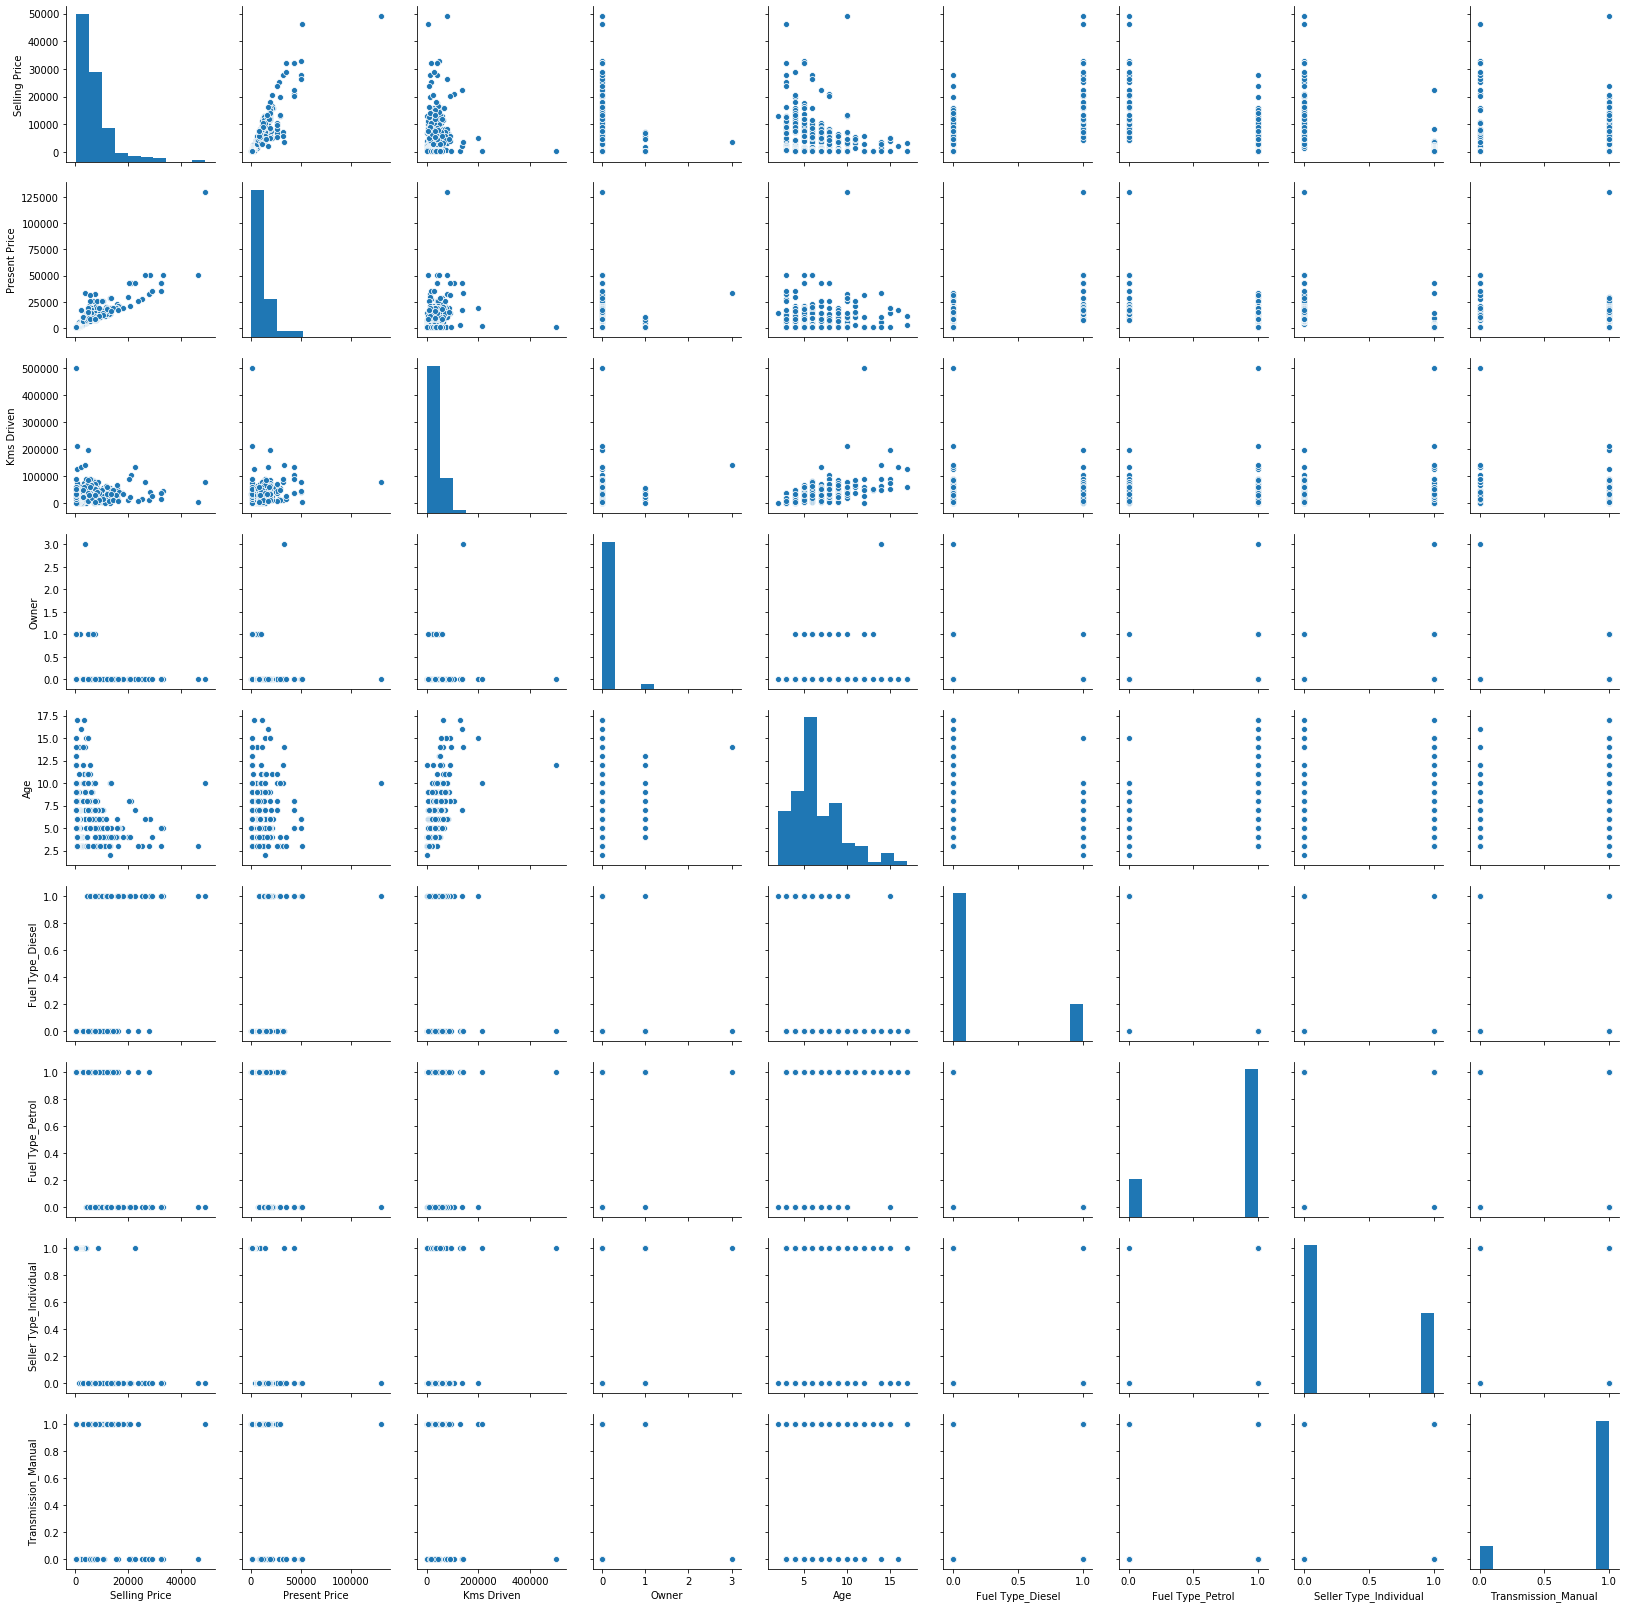

In [11]:
plt.figure(figsize=(20,20))
ax1 = sns.pairplot(mdMod, palette= 'RdBu')
plt.show()

###### **Figure 1.** We use pairplt() to see what variables are positively and negatively correlated. This helps us adequately select features. 

### 2) Heat Plot

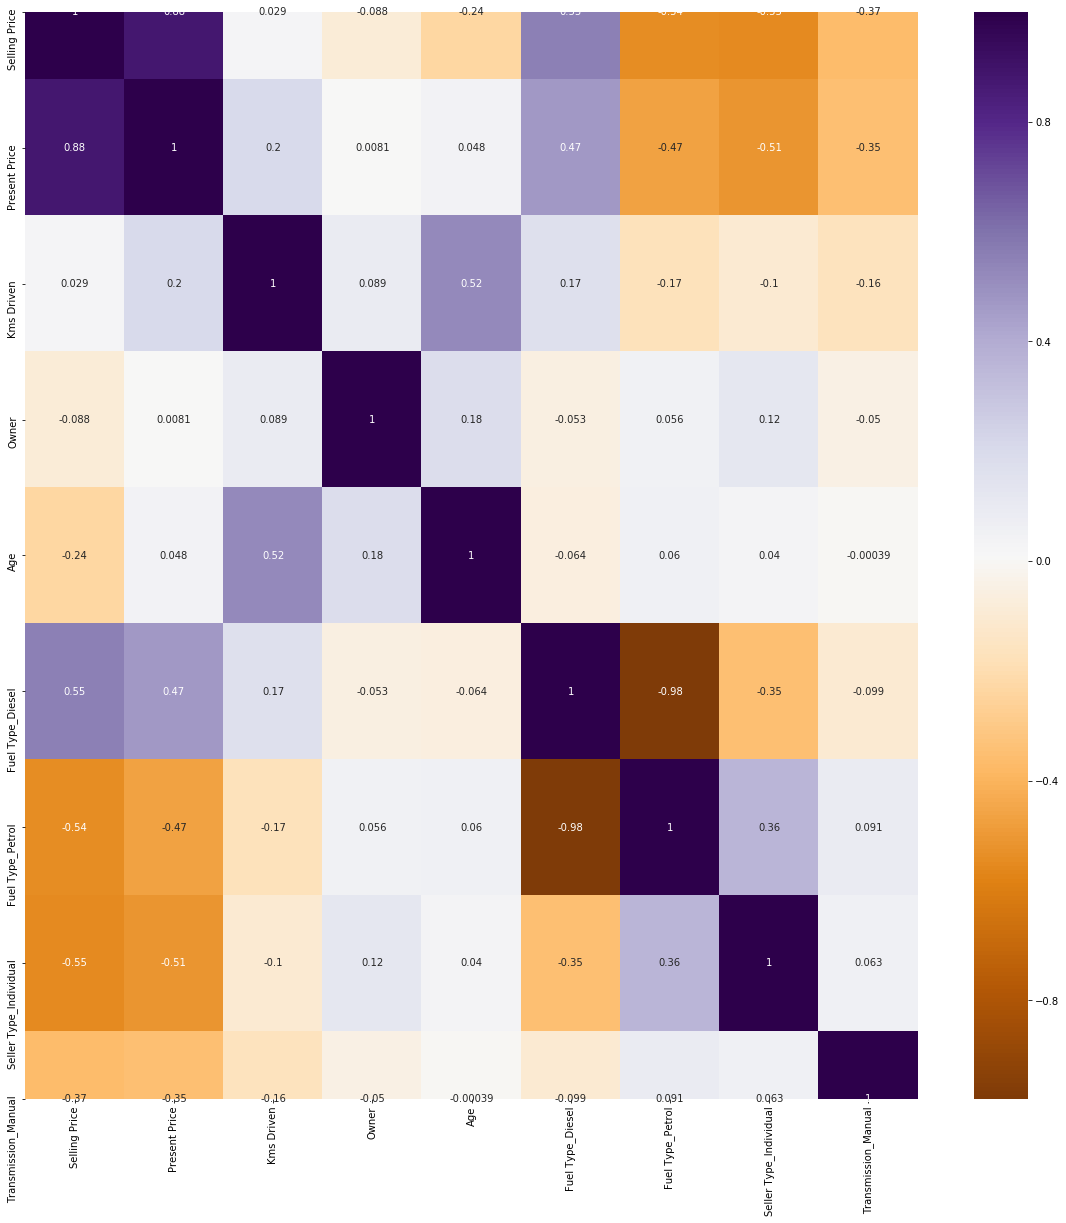

In [12]:
plt.figure(figsize=(20,20))
heat = mdMod.corr()
corrFeat = heat.index
g = sns.heatmap(mdMod[corrFeat].corr(), annot=True, cmap = "PuOr")
plt.show()

###### **Figure 2.** Using heatmap() we can better visualize the correlation matrix.

### C) Dependant and independant features

In [13]:
x = mdMod.iloc[:,1:]
y = mdMod.iloc[:,0]
x.head()

,Present Price,Kms Driven,Owner,Age,Fuel Type_Diesel,Fuel Type_Petrol,Seller Type_Individual,Transmission_Manual
0,7826.0,27000,0,6,0,1,0,1
1,13356.0,43000,0,7,1,0,0,1
2,13790.0,6900,0,3,0,1,0,1
3,5810.0,5200,0,9,0,1,0,1
4,9618.0,42450,0,6,1,0,0,1


In [14]:
y.head()

0     4690
1     6650
2    10150
3     3990
4     6440
Name: Selling Price, dtype: int64

### D) Feature Importance Plot

[3.56650356e-01 3.68144309e-02 4.65904135e-04 8.26321224e-02
 2.62426530e-01 3.28622318e-04 1.43373829e-01 1.17308204e-01]


C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


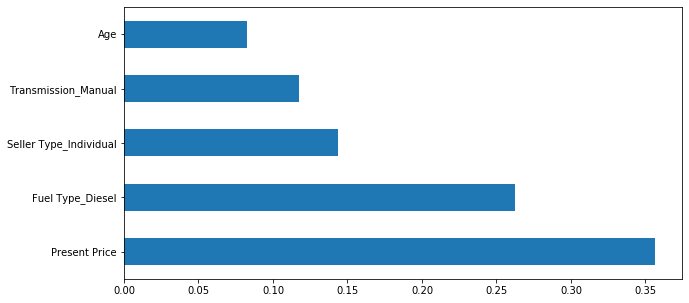

In [15]:
plt.figure(figsize=(10,5))
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_)
featImp = pd.Series(model.feature_importances_, index= x.columns)
featImp.nlargest(5).plot(kind='barh')

###### **Figure 3.** We use the horizontal bar chart to determain the importance of the selected features.

## **V) Models**

### 1) Random Forest Regressor

#### Initial Training

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ranfor = RandomForestRegressor() #Hyperparameters

#### Randomized Search

In [17]:
# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split.
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 5, 10]

#### Create the random grid
Use the random grid to search for best hyperparameters

In [18]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


#### Modeling Random Forest Regresor

In [19]:
# First create the base model to tune.
#rf = RandomForestRegressor(max_depth=random_grid["max_depth"], n_estimators=random_grid["n_estimators"], random_state=False, verbose=False)
rf = RandomForestRegressor()

### 2) RandomizedSearchCV
Random search of parameters, using 3 fold cross validation.

In [20]:
# search across 100 different combinations.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

#### Model Training

In [21]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


#### 7) Printng Parameters

In [22]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

#### 8) Best Score

In [23]:
rf_random.best_score_

-8026945.574994502

#### 9) Plot Predictions

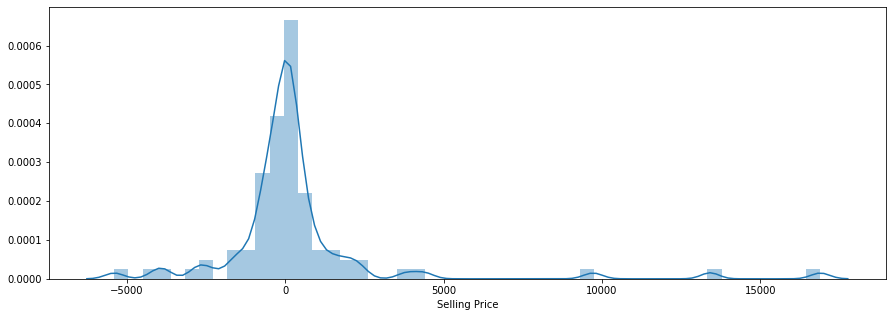

In [24]:
plt.figure(figsize=(15,5))
predictions=rf_random.predict(x_test)
sns.distplot(y_test-predictions)


###### **Figure 4.** We plot our predicitons.

#### 10) Ploting Predictions

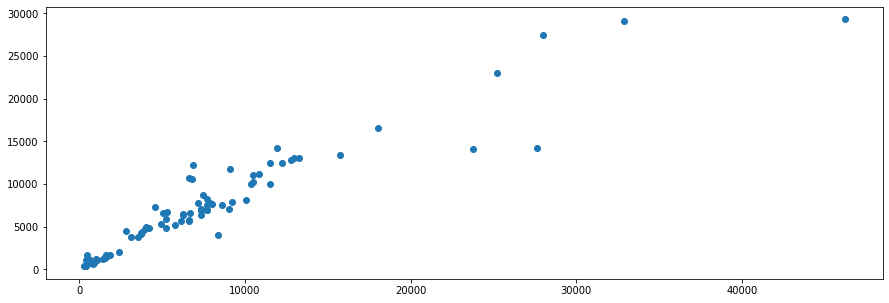

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(y_test,predictions)

###### **Figure 5.** We plot our predicitons.

#### 11) Printing Errors

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1246.9672307692306
MSE: 7938722.362374463
RMSE: 2817.573843286891


## **VI) OUTPUT Files**

In [27]:
# File to store data.
file = open('random_forest_regression_model.pkl', 'wb')

# File to dump information.
pickle.dump(rf_random, file)

In [28]:
print('Code Finished Executing')

Code Finished Executing
